<a href="https://colab.research.google.com/github/iuri/opencv/blob/main/FeatureExtractionOpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/pablomc88/Primate_Visual_System

In [ ]:
import os
from google.colab import drive

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt




# KAZE
import scipy
# from scipy.misc import imread
# import cPickle as pickle
import random


In [ ]:
# to mount Google Drive
drive.mount('/content/gdrive')
print(os.listdir("/content/gdrive/MyDrive/BKP/MESTRADO/dataset/temp"))

Mounted at /content/gdrive
['001.png', '045.png', '002.png', '031.png', '003.png', '069.png', '090.png', '027.png', '129.png', '106.png', '160.png', '146.png', '191.png', '175.png', '2141.png', '2154.png', '222.png', '2150.png', '2151.png', '2153.png', '210.png', '219.png', '220.png', '201.png', '221.png', '2140.png', '2148.png', '2149.png', '2142.png', '2152.png', '3295.png', '3290.png', '3291.png', '3297.png', '3293.png', '3298.png', '3289.png', '3762.png', '401.png', '3759.png', '3760.png', '3761.png', '3757.png', '399.png', '578.png', '601.png', '606.png', '520.png', '603.png', '577.png', '604.png', '599.png', '524.png', '605.png', '523.png', '522.png', '521.png', '402.png']


In [ ]:
# como a maoria dos algoritmos sao aplciados numa unica imagem e utilizam escala de cinza, este bloco esta separado
path = '/content/gdrive/MyDrive/BKP/MESTRADO/dataset/temp/001.png'
img = cv.imread('/content/gdrive/MyDrive/BKP/MESTRADO/dataset/temp/001.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

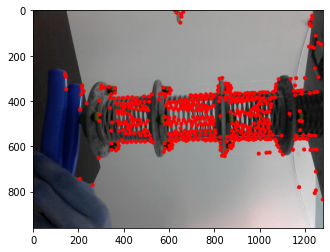

(<matplotlib.image.AxesImage at 0x7f7020b687c0>, None)

In [ ]:
# corners 
corners = cv.goodFeaturesToTrack(gray,500,0.01,10)
corners = np.int0(corners)
# print(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),9,255,-1)
plt.imshow(img),plt.show()

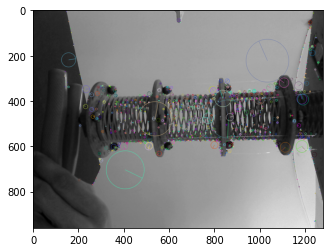

(<matplotlib.image.AxesImage at 0x7f7020971070>, None)

In [ ]:
# SIFT algorithm
# pontos de curvas muito pequenos. Melhorar. modificar o padrao da funcao SIFT_create()
# flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
sift = cv.SIFT_create()
kp = sift.detect(gray,None)
img=cv.drawKeypoints(gray,kp,img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv.imwrite('sift_keypoints.jpg',img)
plt.imshow(img),plt.show()


In [ ]:
# Now to calculate the descriptor, OpenCV provides two methods.
#
# Since you already found keypoints, you can call sift.compute() which computes the descriptors from the keypoints we have found. Eg: kp,des = sift.compute(gray,kp)
# If you didn't find keypoints, directly find keypoints and descriptors in a single step with the function, sift.detectAndCompute().
# We will see the second method:

# sift = cv.SIFT_create()
# kp, des = sift.detectAndCompute(gray,None)
# Here kp will be a list of keypoints and des is a numpy array of shape (Number of Keypoints)×128.

# So we got keypoints, descriptors etc. Now we want to see how to match keypoints in different images. That we will learn in coming chapters.
kp, des = sift.detectAndCompute(gray,None)

In [ ]:
# surf
# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf = cv.xfeatures2d.SURF_create(400)
# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img,None)
len(kp)


error: ignored

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 3970
Total Keypoints without nonmaxSuppression: 17280


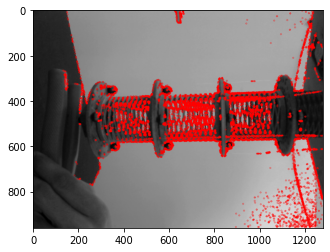

(<matplotlib.image.AxesImage at 0x7f848f44cf40>, None)

In [ ]:
###
### FAST
###
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv.imwrite('fast_true.png', img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# cv.imwrite('fast_false.png', img3)
plt.imshow(img3),plt.show()

Descirptor Size:  32
Shape:  (477, 32)


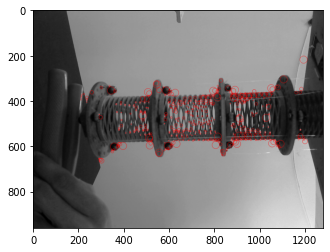

(<matplotlib.image.AxesImage at 0x7f848f6fefa0>, None)

In [ ]:
###
### BRIEF
### Below code shows the computation of BRIEF descriptors with the help of CenSurE detector.
###
img = cv.imread(path,0)

# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()

# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()

# find the keypoints with STAR
kp = star.detect(img,None)

# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
# A função brief.getDescriptorSize() dá o tamanho usado em bytes. Por padrão, é 32. 
print( "Descirptor Size: ", brief.descriptorSize() )
print( "Shape: ", des.shape )

img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0),flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# cv.imwrite('fast_false.png', img3)
plt.imshow(img3),plt.show()

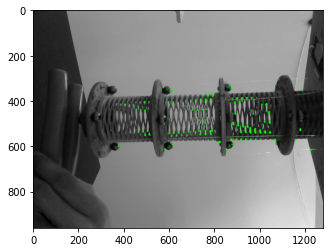

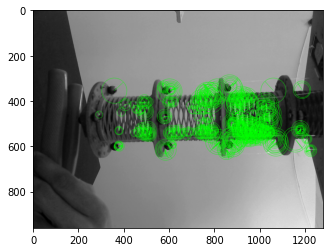

(<matplotlib.image.AxesImage at 0x7f848f506d00>, None)

In [ ]:
###
### ORB
### 
img = cv.imread(path,0)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
img3 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2), plt.show()
plt.imshow(img3), plt.show()

In [ ]:
###
### Brute-Force MAtching with ORB
###
img1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('box_in_scene.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

In [ ]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [ ]:
# Feature extractor
def extract_features(image_path, vector_size=32):
    image = cv2.imread(image_path, mode="RGB")
    try:
        # Using KAZE, cause SIFT, ORB and other was moved to additional module
        # which is adding addtional pain during install
        alg = cv2.KAZE_create()
        # Dinding image keypoints
        kps = alg.detect(image)
        # Getting first 32 of them. 
        # Number of keypoints is varies depend on image size and color pallet
        # Sorting them based on keypoint response value(bigger is better)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        # computing descriptors vector
        kps, dsc = alg.compute(image, kps)
        # Flatten all of them in one big vector - our feature vector
        dsc = dsc.flatten()
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if dsc.size < needed_size:
            # if we have less the 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
    except cv2.error as e:
        print('Error: ', e)
        return None

    return dsc


def batch_extractor(images_path, pickled_db_path="features.pck"):
    files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]

    result = {}
    for f in files:
        print('Extracting features from image %s' % f)
        name = f.split('/')[-1].lower()
        result[name] = extract_features(f)
    
    # saving all our feature vectors in pickled file
    with open(pickled_db_path, 'w') as fp:
        pickle.dump(result, fp)